# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [ ]:
env = UnityEnvironment(file_name="D:/Projects/drl_tennis/Tennis_Windows_x86_64/Tennis.exe")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. Train the agent!

Run the following code to train the agent

In [2]:
from unityagents import UnityEnvironment
from collections import deque
from ddpg_agent import Agent
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name='D:/Projects/drl_tennis/Tennis_Windows_x86_64/Tennis.exe')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

agent = Agent(state_size, action_size, num_agents, random_seed=19920320)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


Episode 1	 Score: -0.00
Episode 2	 Score: -0.00
Episode 3	 Score: -0.00
Episode 4	 Score: -0.00
Episode 5	 Score: -0.00
Episode 6	 Score: -0.00
Episode 7	 Score: -0.00
Episode 8	 Score: -0.00
Episode 9	 Score: -0.00
Episode 10	 Score: -0.00
Episode 10	Average Score: 0.00
Episode 11	 Score: -0.00
Episode 12	 Score: -0.00
Episode 13	 Score: -0.00
Episode 14	 Score: -0.00
Episode 15	 Score: -0.00
Episode 16	 Score: -0.00
Episode 17	 Score: -0.00
Episode 18	 Score: -0.00


D:\Projects\drl_tennis\ddpg_agent.py:120: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 19	 Score: -0.00
Episode 20	 Score: -0.00
Episode 20	Average Score: 0.00
Episode 21	 Score: 0.05
Episode 22	 Score: -0.00
Episode 23	 Score: -0.00
Episode 24	 Score: -0.00
Episode 25	 Score: -0.00
Episode 26	 Score: -0.00
Episode 27	 Score: -0.00
Episode 28	 Score: -0.00
Episode 29	 Score: -0.00
Episode 30	 Score: -0.00
Episode 30	Average Score: 0.00
Episode 31	 Score: -0.00
Episode 32	 Score: -0.00
Episode 33	 Score: -0.00
Episode 34	 Score: -0.00
Episode 35	 Score: -0.00
Episode 36	 Score: -0.00
Episode 37	 Score: -0.00
Episode 38	 Score: -0.00
Episode 39	 Score: -0.00
Episode 40	 Score: -0.00
Episode 40	Average Score: 0.00
Episode 41	 Score: -0.00
Episode 42	 Score: -0.00
Episode 43	 Score: -0.00
Episode 44	 Score: -0.00
Episode 45	 Score: -0.00
Episode 46	 Score: -0.00
Episode 47	 Score: -0.00
Episode 48	 Score: -0.00
Episode 49	 Score: -0.00
Episode 50	 Score: -0.00
Episode 50	Average Score: 0.00
Episode 51	 Score: -0.00
Episode 52	 Score: -0.00
Episode 53	 Score: -0.00
Ep

Episode 302	 Score: -0.00
Episode 303	 Score: -0.00
Episode 304	 Score: -0.00
Episode 305	 Score: -0.00
Episode 306	 Score: -0.00
Episode 307	 Score: -0.00
Episode 308	 Score: -0.00
Episode 309	 Score: -0.00
Episode 310	 Score: -0.00
Episode 310	Average Score: 0.00
Episode 311	 Score: -0.00
Episode 312	 Score: -0.00
Episode 313	 Score: -0.00
Episode 314	 Score: -0.00
Episode 315	 Score: -0.00
Episode 316	 Score: -0.00
Episode 317	 Score: -0.00
Episode 318	 Score: -0.00
Episode 319	 Score: -0.00
Episode 320	 Score: -0.00
Episode 320	Average Score: 0.00
Episode 321	 Score: -0.00
Episode 322	 Score: -0.00
Episode 323	 Score: -0.00
Episode 324	 Score: -0.00
Episode 325	 Score: -0.00
Episode 326	 Score: -0.00
Episode 327	 Score: -0.00
Episode 328	 Score: -0.00
Episode 329	 Score: -0.00
Episode 330	 Score: -0.00
Episode 330	Average Score: 0.00
Episode 331	 Score: -0.00
Episode 332	 Score: -0.00
Episode 333	 Score: -0.00
Episode 334	 Score: -0.00
Episode 335	 Score: -0.00
Episode 336	 Score: 

Episode 584	 Score: -0.00
Episode 585	 Score: -0.00
Episode 586	 Score: -0.00
Episode 587	 Score: 0.20
Episode 588	 Score: -0.00
Episode 589	 Score: 0.10
Episode 590	 Score: 0.05
Episode 590	Average Score: 0.02
Episode 591	 Score: 0.05
Episode 592	 Score: 0.05
Episode 593	 Score: 0.05
Episode 594	 Score: 0.05
Episode 595	 Score: 0.10
Episode 596	 Score: 0.05
Episode 597	 Score: 0.05
Episode 598	 Score: 0.05
Episode 599	 Score: 0.10
Episode 600	 Score: 0.55
Episode 600	Average Score: 0.03
Episode 601	 Score: 0.20
Episode 602	 Score: 0.05
Episode 603	 Score: 0.10
Episode 604	 Score: 0.05
Episode 605	 Score: 0.05
Episode 606	 Score: 0.35
Episode 607	 Score: 0.05
Episode 608	 Score: 0.05
Episode 609	 Score: 0.05
Episode 610	 Score: 0.05
Episode 610	Average Score: 0.04
Episode 611	 Score: 0.05
Episode 612	 Score: 0.55
Episode 613	 Score: 0.05
Episode 614	 Score: 0.05
Episode 615	 Score: 0.25
Episode 616	 Score: 0.05
Episode 617	 Score: 1.00
Episode 618	 Score: 0.05
Episode 619	 Score: 0.10


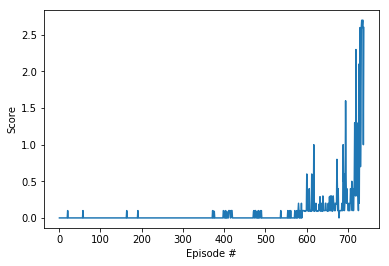

In [3]:
def ddpg(n_episodes=10000, max_t=4000, window_len=100, print_every=10):
    scores_deque = deque(maxlen=window_len)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += rewards
            if any(dones):
                break
        scores_deque.append(np.max(score))
        scores.append(np.max(score))
        print('\rEpisode {}\t Score: {:.2f}'.format(i_episode, np.mean(score)))
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque) > 0.5:
            print('Environment solved in {} episodes'.format(i_episode))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
env.close()